교재 : 파이썬 머신러닝 완벽 가이드

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 표준화를 할 수 있는 객체 생성. p352
scaler = StandardScaler() # 평균 0, 표준편차 1인 데이터 분포로 변환
data_scaled = scaler.fit_transform(cancer.data)
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score
# 모델링, 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print(f'accuracy:{round(accuracy_score(y_test, lr_preds),4)},roc_auc:{round(roc_auc_score(y_test, lr_preds),4)}')

accuracy:0.9766,roc_auc:0.9716


- 과제 10/11 (1)

In [7]:
# p.353
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가(최적화 방안) - accuracy, roc_auc
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                 accuracy_score(y_test, lr_preds),
                                                                 roc_auc_score(y_test, lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


- 과제 10/11 (2)<br> GridSearchCV를 이용하여 최적 하이퍼파라미터 및 최적 평균 정확도를 구하세요.

In [9]:
# p.354    solver는 351p에 있음
from sklearn.model_selection import GridSearchCV
# C(Cost Function)값이 작으면 훈련을 덜 복잡하게(강한 규제), 크면 훈련을 더 복잡하게(약한 규제)
params = {'solver':['lbfgs','liblinear'],
          'penalty':['l2','l1'],
          'C':[0.01,0.1,1,5,10]}
lf_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                 grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


## 회귀트리

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [20]:
# p.357 RandomForestRegressor를 이용해 보스턴 주택 가격 예측
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [22]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423 


- 과제 10/11 (3) 회귀트리 모델들을 이용하여 모델링 및 평가를 수행하세요.

def get_model_cv_prediction(model, X_data, y_target)

In [30]:
# 결정트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용하여 주택 가격 예측 수행/
# get_model_cv_prediction()함수는 입력 모델과 데이터 세트를 입력받아 교차검증으로 평균 RMSE 계산
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('### ', model.__class__.__name__, ' ###')
    print('5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

###  DecisionTreeRegressor  ###
5 교차 검증의 평균 RMSE : 5.978 
###  RandomForestRegressor  ###
5 교차 검증의 평균 RMSE : 4.423 
###  GradientBoostingRegressor  ###
5 교차 검증의 평균 RMSE : 4.269 
###  XGBRegressor  ###
5 교차 검증의 평균 RMSE : 4.251 
###  LGBMRegressor  ###
5 교차 검증의 평균 RMSE : 4.646 


## Regression 실습 - Bike Sharing Demand

In [37]:
# p.363 자전거 대여 수요 예측
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# 2011.01~2012.12 날짜/시간, 기온, 습도, 풍속 등 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수 기재
# 결정 값은 맨 마지막 칼럼인 count로 '대여 횟수'를 의미.
bike_df = pd.read_csv('./dataset/bike_train.csv')
print(bike_df.shape)
bike_df.head()
# season : 1=봄, 2=여름, 3=가을, 4=겨울
# holiday : 1=주말제외 휴일, 0=휴일이 아닌 날
# workingday : 1=휴일이 아닌 주중, 0=주말 및 휴일
# weather : 1=맑음,약간구름 낀 흐림 2=안개,안개+흐림 3=가벼운 눈/비+천둥 4=심한 눈/비, 천둥/번개
# temp : 온도(섭씨)
# atemp : 체감온도(섭씨)
# humidity : 상대습도
# casual : 사전에 등록되지 않는 사용자가 대여한 횟수
# registered : 사전에 등록된 사용자가 대여한 횟수
# count : 대여 횟수

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
bike_df.info()
# datetime이 오브젝트로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 분포가 어떤지 확인해야함. 분포가 왜곡되어 있으면 모델링한 결과가 좋기를 기대하기 어려움
- 최대한 정규화를 해주든 로그화를 해주든 분포를 개선해주는 것이 필요

In [39]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [40]:
# 불필요한 칼럼 삭제
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [41]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

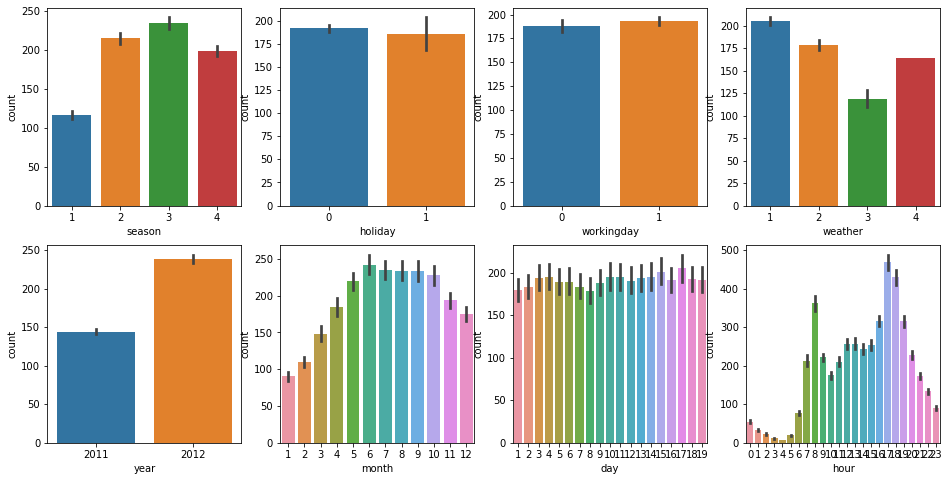

In [42]:
# 2행4열로 그리기
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

<AxesSubplot:>

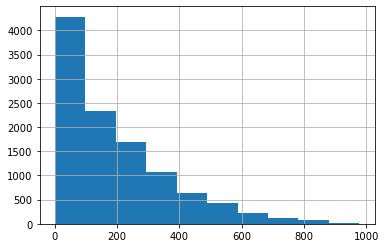

In [48]:
bike_df['count'].hist()
# 왜곡된 값이라 예측 오류가 클 것. 정규분포를 띠지 않음. p.366진행이지만 p.369표와 같음

- 로그변환

In [56]:
# p.367
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
# mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))
# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 mean_absolute_error로 계산
    mae_val = mean_absolute_error(y, pred)
    
    print(f'rmsle:{round(rmsle_val,4)}, rmse:{round(rmse_val,4)}, mae:{round(mae_val,4)}')

In [57]:
# 로그변환, 모델 학습/예측/평가 p.368
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

rmsle:1.1647, rmse:140.8996, mae:105.9244


<AxesSubplot:>

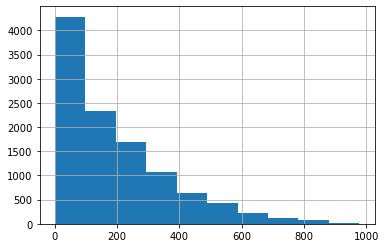

In [58]:
y_target.hist() # p.369
# 왜곡이 심하면 정확도가 떨어짐

<AxesSubplot:>

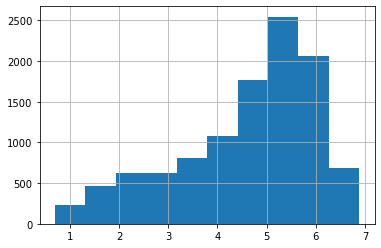

In [60]:
# log1p를 적용한 'count'값의 개선된 분포 p.370
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

- 과제 10/11 (4)

상기 사례에 대하여 로그변환을 수행한 후 모델링 및 평가를 수행하세요.(LinearRegression 적용)

In [62]:
# p.370 하단
# 왜곡 정도가 향상됐으니(성능개선) 이를 이용해 다시 학습 후 평가
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)
# RMSLE 오류는 줄었지만, RMSE는 늘어남.

rmsle:1.0168, rmse:162.5943, mae:109.2862


<AxesSubplot:>

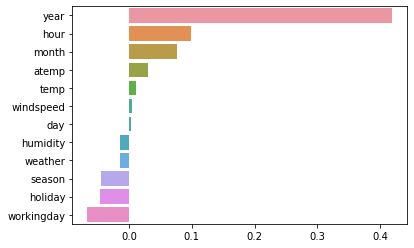

In [63]:
# 이번엔 개별 피처들의 인코딩 적용. 먼저 각 피처의 회귀 계숫값을 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False) # 내림차순
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- 과제 10/11 (5)

상기 사례에 대하여 추가로 카테고리형 변수에 대하여 인코딩 적용 후 모델링 및 평가를 수행하세요.(lr, ridge, lasso 적용)

In [64]:
# year, month, hour, season, weather 등은 숫자로 표기되었지만 카테고리형 피쳐임.
# 그래서 대소크기로 인식되면 안되기 때문에 원핫인코딩으로 변환
# 카테고리형 피쳐들을 One Hot Encoding (p.372)
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday',
                                                     'workingday','season','weather'])

In [67]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                   test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)
# 위에 비해 예측 성능이 많이 향상됨

### LinearRegression ###
rmsle:0.5896, rmse:97.6878, mae:63.3821
### Ridge ###
rmsle:0.5901, rmse:98.5286, mae:63.8934
### Lasso ###
rmsle:0.6348, rmse:113.2188, mae:72.8027


<AxesSubplot:>

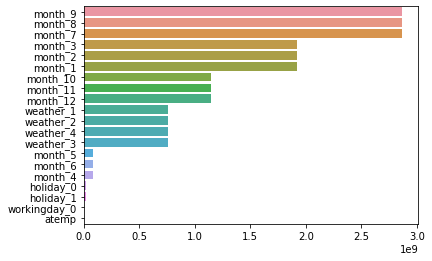

In [68]:
# 원-핫 인코딩된 데이터 세트에서 회귀 계수가 높은 피처를 다시 시각화
# 원-핫 인코딩으로 피처가 늘어났으므로 회귀 계수 상위 25개 피처 추출
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- 과제 10/11 (6)

회귀 트리 모델들을 적용하여 모델링 및 평가를 수행하세요.

In [70]:
# p.374
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM 모델별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DF가 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
rmsle:0.3539, rmse:50.3971, mae:31.1628
### GradientBoostingRegressor ###
rmsle:0.3299, rmse:53.3507, mae:32.7522
### XGBRegressor ###
rmsle:0.3422, rmse:51.7316, mae:31.2512
### LGBMRegressor ###
rmsle:0.3188, rmse:47.2146, mae:29.0288
